# Initial visualization of IMERG monthly data
## Dataset
GPM IMERG Final Precipitation L3 1 month 0.1 degree x 0.1 degree V07 (GPM_3IMERGM) at GES DISC:
[data](https://search.earthdata.nasa.gov/search/granules?p=C2723754851-GES_DISC&pg[0][v]=f&pg[0][qt]=2018-01-01T00%3A00%3A00.000Z%2C&pg[0][gsk]=-start_date&as[platforms][0]=Other%3AModels%3AMerged%20Analysis%3AIMERG&tl=1694036563!3!!&fpc0=Models&fpsc0=Merged%20Analysis&fps0=IMERG&fpb0=Other) from NASA Earthdata. [GSFC documentation](https://disc.gsfc.nasa.gov/datasets/GPM_3IMERGM_07/summary) and [GPM documentation](https://gpm.nasa.gov/sites/default/files/2023-07/IMERG_V07_ReleaseNotes_final_230713.pdf)

## Environments and packages


## to-do's
- [x] load a single HDF5 file
- [ ] decide on xarray or geopandas?
- [ ] create spatial subset function
- [ ] create multi-month selection function

## Load packages and filenames

In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd
import xarray as xr
import h5py
import os
import sys
import matplotlib.pyplot as plt

## Full conversion from IMERG HDF files to single xr.DataArray

In [ ]:
# Grab all filenames
imerg_filepath = '/global/scratch/users/ann_scheliga/IMERG_monthly_data/'
func_dir = '/global/home/users/ann_scheliga/CYGNSS-GRACE/codebase/'



In [ ]:
# Create empty np.array

# iterate through files
    # break loop if current lat/lon do not match previous iterations'
    

## Working tests and code

In [3]:
test_filename = '3B-MO.MS.MRG.3IMERG.20180101-S000000-E235959.01.V07A.HDF5'
imerg_filepath = '/global/scratch/users/ann_scheliga/IMERG_monthly_data/'
func_dir = '/global/home/users/ann_scheliga/CYGNSS-GRACE/codebase/'

In [4]:
# Loads 1 month, global data
f = h5py.File(imerg_filepath + test_filename,'r')  

In [10]:
print('Level 1 keys:',f.keys())
print('Level 2 keys:',f['Grid'].keys())

Level 1 keys: <KeysViewHDF5 ['Grid']>
Level 2 keys: <KeysViewHDF5 ['nv', 'lonv', 'latv', 'time', 'lon', 'lat', 'time_bnds', 'lon_bnds', 'lat_bnds', 'precipitation', 'randomError', 'gaugeRelativeWeighting', 'probabilityLiquidPrecipitation', 'precipitationQualityIndex']>


**Description of keys**

*nv* , *lonv* , *latv* : tuples of (0 , 0). I don't know their purpose

*time* : start time of file, appears to be in seconds since start of 1980\
*time_bnds* : start and end time of file in same unit as *time*

*lon*, *lat*: center of each pixel\
*lon_bnds* , *lat_bnds*: edges of each pixel

In [53]:
# Timeframe
time_bnds = f['Grid']['time_bnds'][0][:]
print(time_bnds)

[1198800000 1201478400]


In [71]:
lon_var = f['Grid']['lon'][:]
lat_var = f['Grid']['lat'][:]
lat_grid , lon_grid = np.meshgrid(lat_var,lon_var)

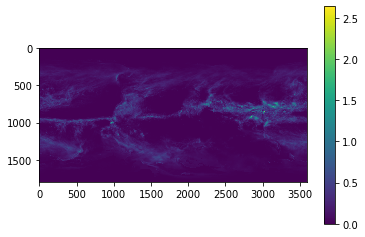

In [81]:
# Precipitation values
test = f['Grid']['precipitation'][:].T.squeeze()
test[test<0] = np.nan
plt.imshow(test)
plt.colorbar()

In [96]:
time_bnds[0]

1198800000

In [89]:
test3d = test[np.newaxis,:]
test3d.shape

(1, 1800, 3600)

In [90]:
xr_test = xr.DataArray(
    test,
    coords = {
        "time":time_bnds[0],
        "lat": lat_var,
        "lon": lon_var
    },
    dims = ['time','lat','lon']
)

ValueError: coordinate 'time' is a DataArray dimension, but it has shape () rather than expected shape (1,) matching the dimension size

## Scratch work and loose ends

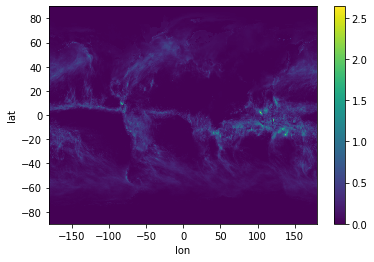

In [84]:
xr_test.plot()